In [55]:
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

In [4]:
dataset = load_boston()
X=dataset.data
y=dataset.target[:,np.newaxis]
print("The dataset has ", X.shape, " data points")

The dataset has  (506, 13)  data points


In [11]:
#Define cost function
def compute_cost(X,y,params):
    n_samples = len(y)
    h = X @ params 
    return (1/(2*n_samples))*np.sum((h-y)**2)
#Check cost function
params = np.array(range(1,14,1))
print(compute_cost(X,y,params))

23132240823.734848


In [16]:
#Define greadient descent function
def gradient_descent(X,y,params,learning_rate,n_iters):
    n_samples = len(y)
    J_history = np.zeros((n_iters,1))
    for i in range(n_iters):
        params = params - (learning_rate/n_samples) * X.T @ (X @ params - y) 
        J_history[i] = compute_cost(X,y,params)
    return (J_history,params)
params = np.ones((13,1))
print("This is cost history :", gradient_descent(X,y,params,0.1,10)[0])
print("This is params history :", gradient_descent(X,y,params,0.1,10)[1])
        

This is cost history : [[4.02218750e+14]
 [3.94067620e+23]
 [3.86081896e+32]
 [3.78258002e+41]
 [3.70592659e+50]
 [3.63082653e+59]
 [3.55724836e+68]
 [3.48516123e+77]
 [3.41453495e+86]
 [3.34533990e+95]]
This is params history : [[1.13947831e+43]
 [2.54701405e+43]
 [3.08678587e+43]
 [1.74806845e+41]
 [1.45344740e+42]
 [1.59486759e+43]
 [1.82213249e+44]
 [9.14859630e+42]
 [2.82399915e+43]
 [1.12663633e+45]
 [4.76516625e+43]
 [9.10312719e+44]
 [3.40548869e+43]]


In [17]:
#Normalise X
n_samples = len(y)
mu = np.mean(X,0)
sigma=np.std(X,0)
X= (X-mu)/sigma
X= np.hstack((np.ones((n_samples,1)),X))
n_features = np.size(X,1)
params= np.zeros((n_features,1))
print(mu, " ", sigma, " ", params)

[3.59376071e+00 1.13636364e+01 1.11367787e+01 6.91699605e-02
 5.54695059e-01 6.28463439e+00 6.85749012e+01 3.79504269e+00
 9.54940711e+00 4.08237154e+02 1.84555336e+01 3.56674032e+02
 1.26530632e+01]   [8.58828355e+00 2.32993957e+01 6.85357058e+00 2.53742935e-01
 1.15763115e-01 7.01922514e-01 2.81210326e+01 2.10362836e+00
 8.69865112e+00 1.68370495e+02 2.16280519e+00 9.12046075e+01
 7.13400164e+00]   [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


Initial cost is:  296.0734584980237 

Optimal parameters are: 
 [[22.53279993]
 [-0.83241565]
 [ 0.92556198]
 [-0.17350868]
 [ 0.72718532]
 [-1.82619071]
 [ 2.78146364]
 [-0.05529233]
 [-2.96708971]
 [ 1.80477388]
 [-1.1800098 ]
 [-2.00112109]
 [ 0.86262458]
 [-3.69964276]] 

Final cost is:  [11.00859814]


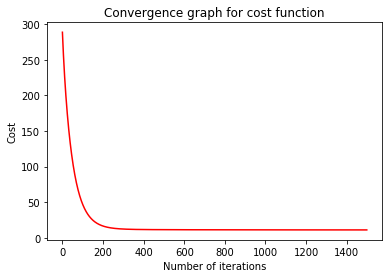

In [25]:
n_iters = 1500
learning_rate = 0.01
initial_cost = compute_cost(X,y,params)
print("Initial cost is: ", initial_cost, "\n")
(J_history, optimal_params) = gradient_descent(X,y,params, learning_rate, n_iters)
print("Optimal parameters are: \n", optimal_params,"\n")
print("Final cost is: ", J_history[-1])
plt.plot(range(len(J_history)), J_history, 'r')
plt.title("Convergence graph for cost function")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [51]:
class OurLinearRegression():
    def __init__(self,X,y,alpha=0.03, n_iter=1500):
        self.alpha = alpha
        self.n_iter= n_iter
        self.n_samples = len(y)
        self.n_features = np.size(X,1)
        self.X = np.hstack((np.ones((self.n_samples,1)), (X-np.mean(X,0))/np.std(X,0)))
        self.y = y[:,np.newaxis]
        self.params= np.zeros((self.n_features+1,1))
        self.coef_ = None
        self.intercept_ = None
    
    def fit(self):     
        for i in range(self.n_iter):
            self.params = self.params - (self.alpha/self.n_samples) * \
            self.X.T @ (self.X @ self.params  - self.y)
            
            self.intercept_ = self.params[0]
            self.coef_ = self.params[1:]
            
        return self
    
    def score(self, X= None, y=None):
        if X is None:
            X =self.X
        else: 
            n_samples = np.size(X,0)
            X= np.hstack((np.ones((n_samples,1)), (X-np.mean(X,0))/np.std(X,0)))
        if y is None:
            y = self.y 
        else:
            y = y[:, np.newaxis]
        
        y_pred = X @ self.params
        score = 1 - (((y-y_pred)**2).sum()/ ((y-y.mean())**2).sum())
        return score 
    
    def predict(self,X):
        n_samples = np.size(X,0)
        y = np.hstack((np.ones(n_samples,1),(X-np.mean(X,0))/np.std(X,0))) @ self.params 
        return y
    
    def get_params(self):
        return self.params 

In [47]:
dataset = load_boston()
X = dataset.data 
y = dataset.target 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
print("Number of obs ", np.size(X_train,0))
print("Number of test obs ", np.size(X_test,0))
print("Number of y obs ", np.size(y_train,0))

Number of obs  354
Number of test obs  152
Number of y obs  354


In [54]:
our_regressor = OurLinearRegression(X_train,y_train).fit()

In [56]:
sklearn_regressor = LinearRegression().fit(X_train,y_train)

In [58]:
our_train_accuracy = our_regressor.score()
sklearn_train_accuracy = sklearn_regressor.score(X_train,y_train)
our_test_accuracy = our_regressor.score(X_test,y_test)
sklearn_test_accuracy = sklearn_regressor.score(X_test,y_test)

In [60]:
print(pd.DataFrame([[our_train_accuracy, sklearn_train_accuracy],[our_test_accuracy, sklearn_test_accuracy] ],   ['Training Accuracy', 'Test Accuracy'],    
             ['Our Implementation', 'Sklearn\'s Implementation']))

                   Our Implementation  Sklearn's Implementation
Training Accuracy            0.743485                  0.743502
Test Accuracy                0.675179                  0.710920
